In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/My Drive/code' .
!mv code/* .
!rmdir code

In [ ]:
!unzip -qq '/content/drive/My Drive/data.zip' -d .

In [ ]:
!pip install --upgrade torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip install --upgrade scipy==1.2.1

## Train

In [ ]:
!python3 train.py

Epoch: [0][937/938]	Batch Time 0.237 (0.118)	Data Load Time 0.000 (0.000)	Loss 5.1059 (5.5926)	Top-5 Accuracy 48.193 (41.267)
Validation: [156/157]	Batch Time 0.169 (0.095)	Loss 5.3300 (4.9185)	Top-5 Accuracy 40.777 (50.791)	

 * LOSS - 4.918, TOP-5 ACCURACY - 50.791, BLEU-4 - 0.0538498769892861

Epoch: [1][937/938]	Batch Time 0.061 (0.119)	Data Load Time 0.000 (0.000)	Loss 4.8675 (4.8011)	Top-5 Accuracy 51.323 (52.713)
Validation: [156/157]	Batch Time 0.028 (0.087)	Loss 4.7227 (4.5590)	Top-5 Accuracy 52.252 (55.977)	

 * LOSS - 4.559, TOP-5 ACCURACY - 55.977, BLEU-4 - 0.08125931881228934

Epoch: [2][937/938]	Batch Time 0.064 (0.119)	Data Load Time 0.000 (0.000)	Loss 4.3725 (4.5400)	Top-5 Accuracy 55.610 (56.088)
Validation: [156/157]	Batch Time 0.029 (0.087)	Loss 4.3440 (4.3744)	Top-5 Accuracy 56.250 (58.378)	

 * LOSS - 4.374, TOP-5 ACCURACY - 58.378, BLEU-4 - 0.08884859349323865


Validation: [156/157]	Batch Time 0.022 (0.087)	Loss 4.5602 (4.2555)	Top-5 Accuracy 55.556 (59.750)	

 *

In [ ]:
# Copy checkpoints to drive
!cp BEST_checkpoint_flickr8k_5_cap_per_img_5_min_word_freq.pth.tar '/content/drive/My Drive/'
!cp checkpoint_flickr8k_5_cap_per_img_5_min_word_freq.pth.tar '/content/drive/My Drive/'

In [ ]:
!mkdir checkpoints
!mv *.pth.tar checkpoints

## Inference

In [ ]:
import json
import torch

from caption import caption_image_beam_search, visualize_att

%matplotlib inline

In [ ]:
with open('data/WORDMAP_flickr8k_5_cap_per_img_5_min_word_freq.json', 'r') as j:
    word_map = json.load(j)

rev_word_map = {v: k for k, v in word_map.items()}  # idx2word

In [ ]:
checkpoint = torch.load('checkpoints/BEST_checkpoint_flickr8k_5_cap_per_img_5_min_word_freq.pth.tar', map_location='cuda')
decoder = checkpoint['decoder']
decoder = decoder.to('cuda')
decoder.eval()
encoder = checkpoint['encoder']
encoder = encoder.to('cuda')
encoder.eval()

Caption:
a woman in a bikini and a brown dog on a leash on the beach



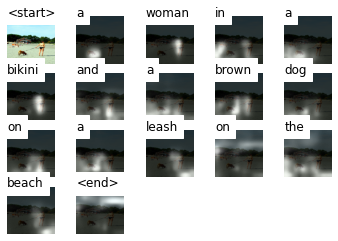

In [ ]:
image = 'data/images/2786299623_a3c48bd318.jpg'
seq, alphas = caption_image_beam_search(encoder, decoder, image, word_map, 5)
alphas = torch.FloatTensor(alphas)

print(f'Caption:\n{" ".join([rev_word_map[ind] for ind in seq][1:-1])}\n')

visualize_att(image, seq, alphas, rev_word_map)

## Save model state dict for deploying to lambda

In [ ]:
ecpu = encoder.to('cpu')
torch.save(ecpu.state_dict(), 'encoder_cpu.pt')

dcpu = decoder.to('cpu')
torch.save(dcpu.state_dict(), 'decoder_cpu.pt')

# Save to google drive
!mv *.pt '/content/drive/My Drive'